# Analysis of the Result of the Grid Search Experiment from 
 

The `plot_results` function plots the results of the parameter search of one corpus at a given sample size.

In [1]:
%pylab inline
from matplotlib import pyplot as plt
from itertools import product, cycle
from collections import OrderedDict, defaultdict

def plot_correletaion_matrix(df, parameter, sample_size, title):
    variables = list(parameter.keys())
    num_vars = len(variables)
    df = df.loc[df['sample_size'] == sample_size]

    grouped = OrderedDict({})
    for x, y in product(variables, variables):
        grouped[(y, x)] = df['mean'].groupby([df[x], df[y]])

    colors = ['tomato', 'black', 'green', 'c', 'gold', 'tan', 'royalblue', 'brown', 'purple']

    # calc min and max values per row
    min_max = defaultdict(lambda : {'min': 1, 'max': 0})
    for (_, variable), series in grouped.items():
        min_val = series.mean().min()
        max_val = series.mean().max()
        min_max[variable]['min'] = min_val if min_val < min_max[variable]['min'] else min_max[variable]['min']
        min_max[variable]['max'] = max_val if max_val > min_max[variable]['max'] else min_max[variable]['max']

    fig, ax = plt.subplots(num_vars, num_vars, figsize=(9.75, 9.75))

    for p_coor, (param_names, series) in zip(product(range(num_vars), range(num_vars)), grouped.items()):
        table = series.mean().unstack()
        data = {row: np.array([(x, y) for x, y in series.items()]) for row, series in table.iterrows()}

        # set log scale if config demands
        if plot_params[param_names[0]]['scale'] == 'log':
            ax[p_coor[0], p_coor[1]].set_xscale('log')

        for c, (k, v) in zip(cycle(colors), data.items()):
            axis = ax[p_coor[0], p_coor[1]]
            axis.plot(v[:, 0], v[:, 1], c=c, label=k)
            axis.set_ylim(
                max(min_max[param_names[1]]['min'] * .95, 0) , 
                min(min_max[param_names[1]]['max'] * 1.05, 1)
            )

            # special treatment for diagonal items
            if p_coor[0] == p_coor[1]:
                axis.legend(loc='center right')
                axis.tick_params(axis='both', which='both', left='off', bottom='off', right='off', top='off')
                axis.grid('off')


    for axis in ax[:-1, :].flatten():
        axis.tick_params(
            axis='x',
            which='both',
            top='off',
            labelbottom='off')
        axis.tick_params(
            axis='y',
            which='both',
            right='off')

    # horizontal labels
    for (variable, value), axis in zip(parameter.items(), ax[-1, :].flatten()):
        axis.xaxis.set_label_text(variable)
        axis.xaxis.set_ticks(value)

    # vertical labels
    for v, axis in zip(variables, ax[:, 0].flatten()):
        axis.yaxis.set_label_text(v)

    # disable y-axis tick label for most subplots
    for axis in ax[:, 1:].flatten():
        axis.tick_params(
            axis='y',
            labelleft='off')
        
    plt.tight_layout()
    fig.text(.5, 1, title, horizontalalignment='center', fontsize=20) 
    plt.show()

Populating the interactive namespace from numpy and matplotlib


In the following cell the meta configuration (i.e. samples sizes and corpus configurations) from the previous notebook is loaded. Also the parameters for the plotting are set. **Note:** Enter the actual filename into the `results` tuple. Also, the `corpus` variable needs to be adapted to the corpus that you wish to analyze.

In [2]:
import pandas as pd
import pickle

experiment_data = None
corpus = 'amazon'
results = ('/home/ebuka/Desktop/masterarbeit/dataframe/20180707-13:39_gs_resultrealtestfinal10000.pkl') # enter actual filename here
with open(results, 'rb') as fh:
    experiment_data = pickle.load(fh)
    
max_sample_size = max(experiment_data['sample_sizes'])

experiment_data['param_labels'] = {
    'trans__size' : r'd',
    'trans__iter': r'epoch',
    'trans__alpha': r'\alpha',
    'trans__negative': r'ns',
    'trans__window': r'win',
    'trans__hs': r'hs',
    'trans__sg': r'arch',
    'cls__n_neighbors': r'k',        
}

plot_params = { # This dict configures x-axis scale and the data type of th ecorresponding variables
    'trans__size' :     {'scale': 'linear'},
    'trans__iter':      {'scale': 'linear'},
    'trans__alpha':     {'scale': 'log'},
    'trans__negative':  {'scale': 'linear'},
    'trans__window':    {'scale': 'linear'},
    'trans__hs':        {'scale': 'linear'},
    'trans__sg':        {'scale': 'linear'},
    'cls__n_neighbors':           {'scale': 'linear'},
    'sample_size':      {'scale': 'log'},
}

# Plotting style

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import product

# colors and fonts
plt.style.use('seaborn-paper')
sns.set_style("white")
sns.set_context("paper")
mpl.rc("font", family="cmr10")

# sizes
plot_width=4.802 # the width of a lncs column
plot_height = plot_width / 1.618
fontsize = 8

# linestyles
def linestyle_gen():
    colors = [(0, 0, 0), (.6, .6, .6)]
    linestyles = ['-', '--', ':']
    return product(colors, linestyles)

# Plot description
The following plots depict the results per corpus/sample size manner (that is, each plot deals with a given sample size on one corpus).  
Each plot creates an overview of all parameters that were taken into account. The plots are organized in a row-wise manner; elements on the diagonal of these plots contain the legend for all the other plots in that row. Likewise, the labels on the left of the leftmost subplot in a row specify the variable of interest in that row.
All y-axes in the plots depict the mean success rate of the classification task. Each subplot describes the influence of the corresponding variables on the mean results of the parameter search.

/home/ebuka/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/home/ebuka/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


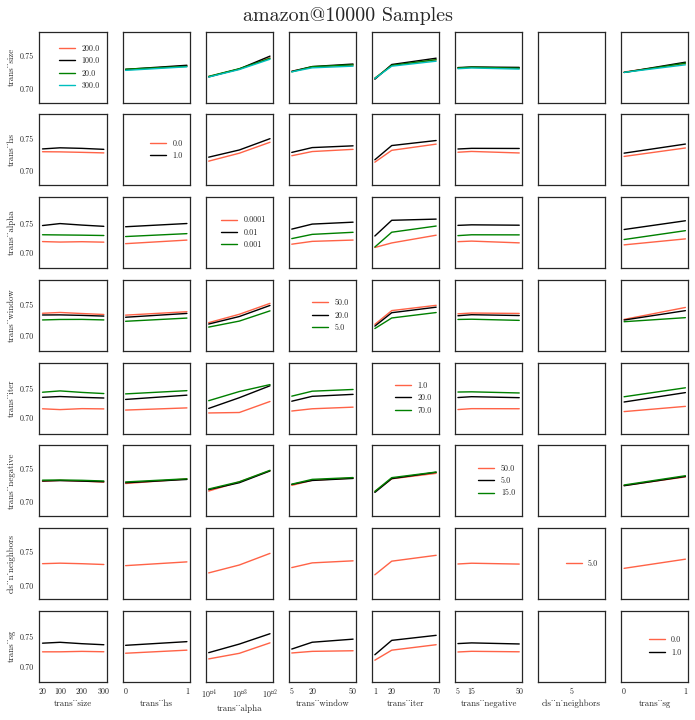

In [4]:
from itertools import product

for (name, subexperiment), size in product(experiment_data['corpora'].items(), experiment_data['sample_sizes']):
    plot_correletaion_matrix(subexperiment['gs_results'],
                             experiment_data['gs_params'],
                             size, 
                             '{}@{} Samples'.format(name, size))
    

# Closer look onto some of the previous plots

In [5]:
import matplotlib.pylab as plt
from itertools import cycle

def plot_correlations(experiment_data, corpus, sample_size, params, y_margin=.1):
    df = experiment_data['corpora'][corpus]['gs_results']
    df = df.loc[df['sample_size'] == sample_size]

    fig, ax = plt.subplots(figsize=(plot_width, plot_height))
    
    param1, param2, s, t = params
        
    grouped = df['mean'].groupby([df[param1], df[param2]])
    mean = grouped.mean()
    std = grouped.mean()
    for (instance, series), (c, linestyle) in zip(mean.unstack().iterrows(), cycle(linestyle_gen())):
        param1_name = experiment_data['param_labels'][param1]
        param2_name = experiment_data['param_labels'][param2]
        data = np.array(list(series.items()))
        min_max_x = min(data[:, 0]), max(data[:, 0])
        min_max_y = (
            max(0, min(data[:, 1])*(1-y_margin)), 
            min(1, max(data[:, 1])*(1+y_margin)))
        label = r'$\theta_{' + param1_name + r'}=' + str(t(instance)) + r'$'

        ax.plot(data[:, 0], data[:, 1], linestyle, color=c, label=label)
        ax.grid(True)
        ax.set_ylabel('Accuracy')
        ax.set_xlabel(r'$\theta_{' + param2_name + r'}$')
        ax.set_xlim(min_max_x)
        ax.set_ylim(min_max_y)
        ax.set_xscale(s)
        ax.legend(loc='upper left')
    
    param_name = experiment_data['param_labels'][params[0]]
    plt.savefig('/home/ebuka/Desktop/masterarbeit/dataframe/corelation/correlation_{}_{}_{}@{}.eps'
        .format(param1, param2, corpus, sample_size), bbox_inches='tight', )
    plt.show()

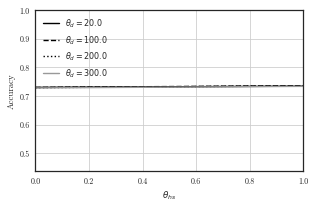

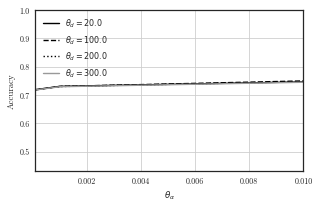

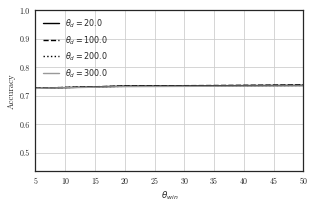

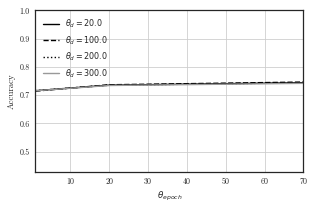

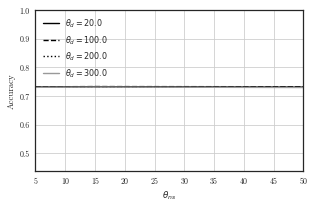

/home/ebuka/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))


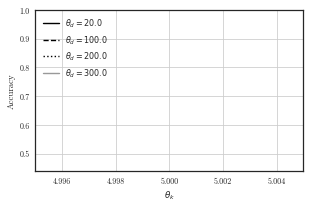

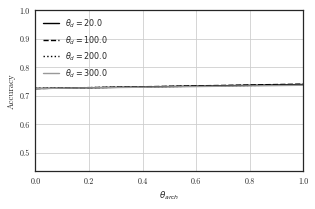

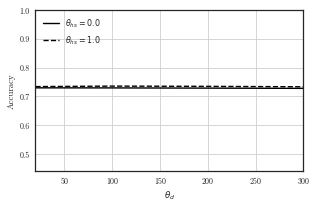

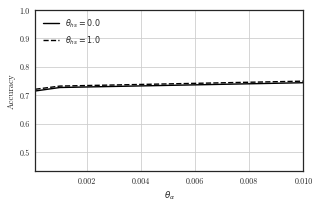

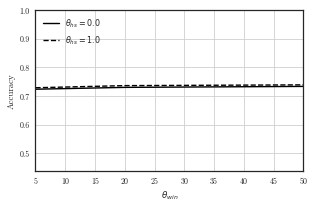

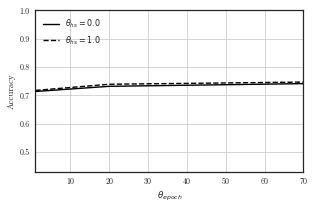

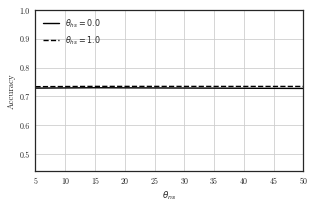

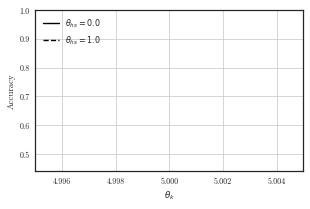

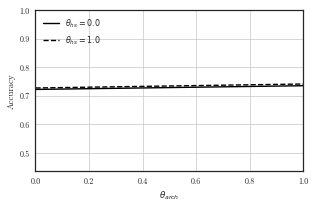

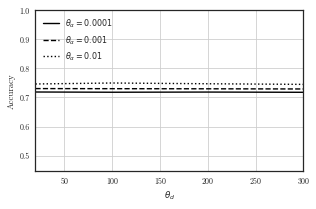

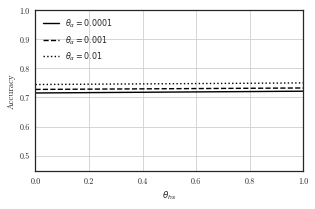

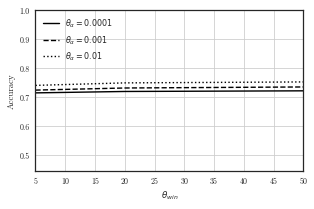

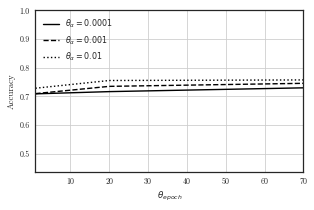

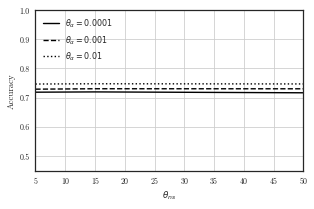

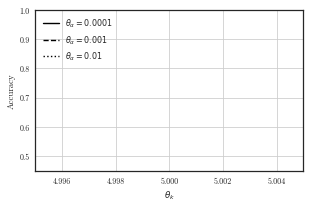

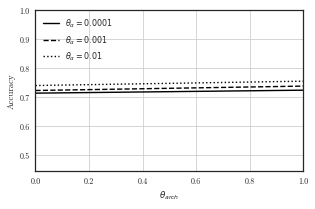

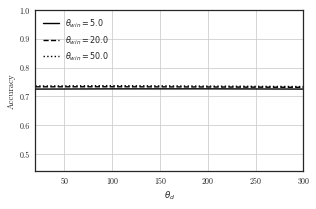

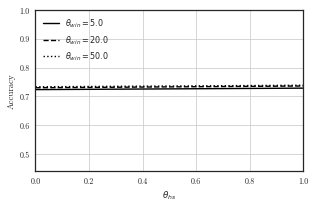

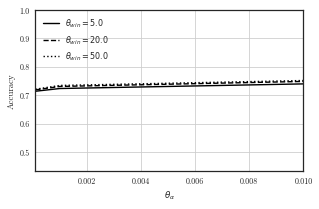

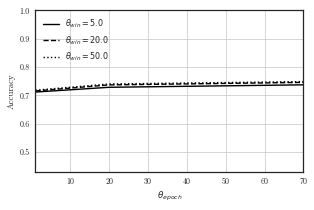

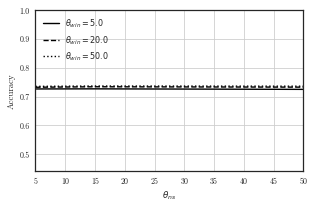

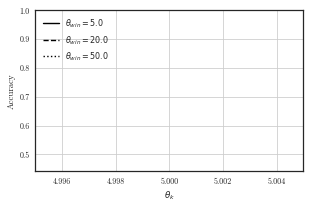

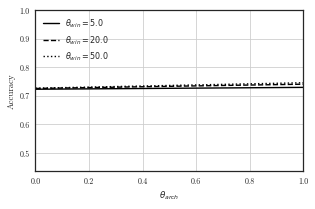

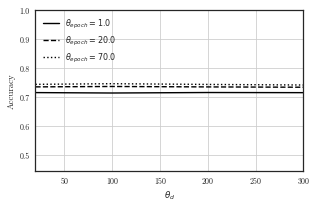

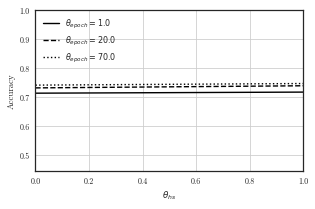

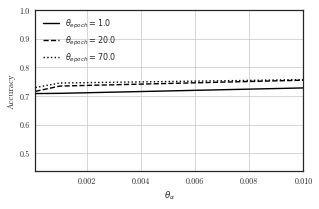

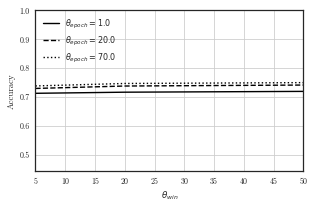

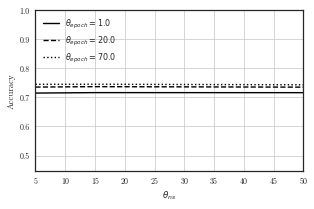

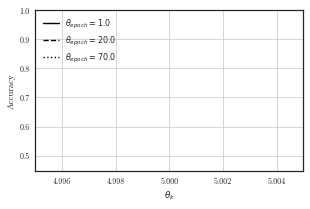

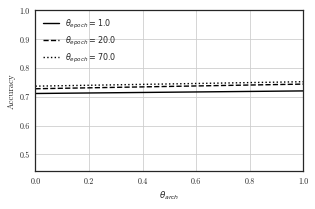

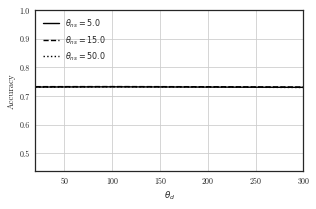

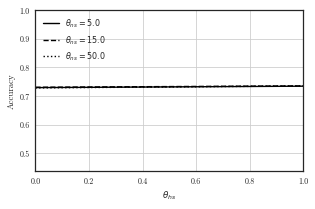

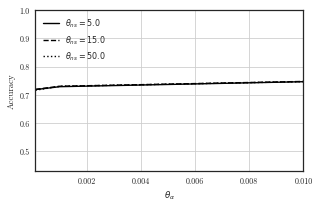

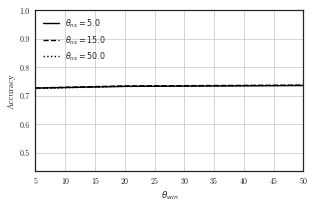

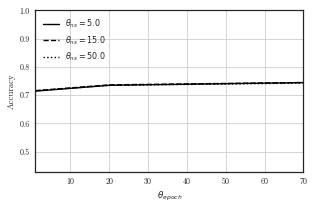

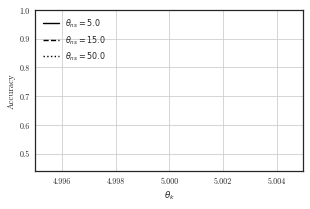

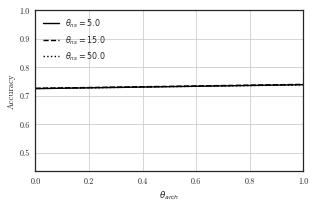

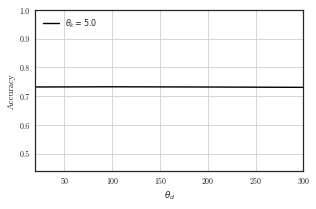

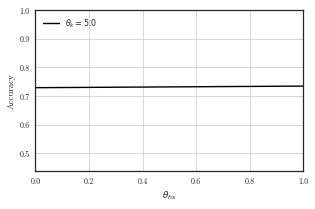

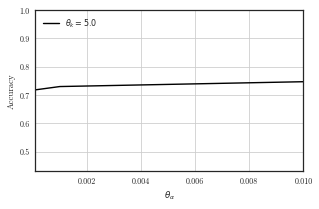

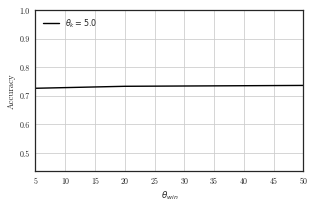

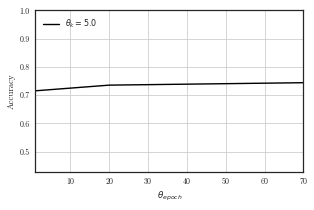

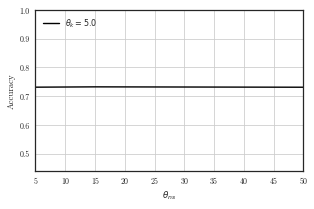

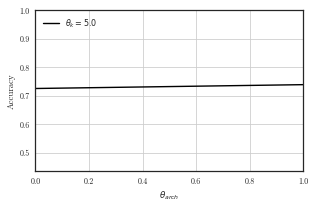

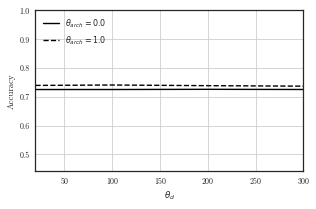

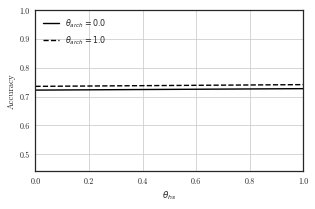

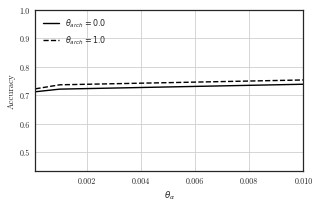

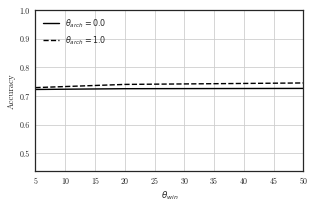

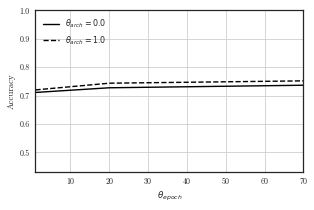

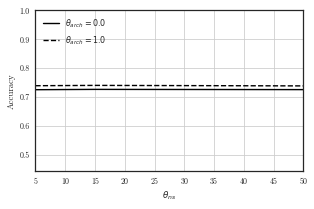

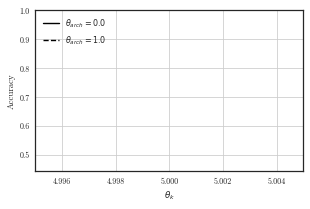

In [6]:
variables = experiment_data['gs_params'].keys()

for param1, param2 in product(variables, variables):
    if param1 == param2:
        continue
    params = ((param1, param2, 'linear', float))
    plot_correlations(experiment_data, corpus, max_sample_size, params, y_margin=.4)

# Best scoring results

In [7]:
def load_dataframe(experiment_data, corpus_name='amazon', sample_size=10000, start=None, end=None):
    df = experiment_data['corpora'][corpus_name]['gs_results']
    sorted_df = df.sort_values('mean', ascending=False)
    
    return sorted_df.loc[sorted_df['sample_size'] == sample_size].iloc[start:end]

In [8]:
df = load_dataframe(experiment_data, corpus_name='amazon', sample_size=10000)
df.drop('index', axis=1, inplace=True)
df.iloc[:3000]

,cls__n_neighbors,trans__alpha,trans__hs,trans__iter,trans__negative,trans__sg,trans__size,trans__window,sample_size,mean,std
353,5.0,0.0100,0.0,20.0,50.0,1.0,100.0,50.0,10000,0.7816,0.009035
329,5.0,0.0100,0.0,20.0,15.0,1.0,100.0,50.0,10000,0.7790,0.004804
89,5.0,0.0100,1.0,20.0,5.0,1.0,100.0,50.0,10000,0.7769,0.008856
305,5.0,0.0100,0.0,20.0,5.0,1.0,100.0,50.0,10000,0.7769,0.009238
617,5.0,0.0010,1.0,70.0,15.0,1.0,100.0,50.0,10000,0.7767,0.004742
112,5.0,0.0100,1.0,20.0,15.0,1.0,100.0,20.0,10000,0.7766,0.009000
137,5.0,0.0100,1.0,20.0,50.0,1.0,100.0,50.0,10000,0.7762,0.007542
136,5.0,0.0100,1.0,20.0,50.0,1.0,100.0,20.0,10000,0.7758,0.002820
209,5.0,0.0100,1.0,70.0,50.0,1.0,100.0,50.0,10000,0.7749,0.003424
113,5.0,0.0100,1.0,20.0,15.0,1.0,100.0,50.0,10000,0.7748,0.011529


In [9]:
df.iloc[int((len(df)/2)-5):int((len(df)/2)+5)]

,cls__n_neighbors,trans__alpha,trans__hs,trans__iter,trans__negative,trans__sg,trans__size,trans__window,sample_size,mean,std
1077,5.0,0.0001,1.0,70.0,50.0,1.0,300.0,5.0,10000,0.7289,0.001553
533,5.0,0.0010,1.0,20.0,15.0,0.0,100.0,50.0,10000,0.7289,0.005511
538,5.0,0.0010,1.0,20.0,15.0,0.0,300.0,20.0,10000,0.7289,0.006371
539,5.0,0.0010,1.0,20.0,15.0,0.0,300.0,50.0,10000,0.7289,0.007899
1009,5.0,0.0001,1.0,70.0,5.0,0.0,20.0,20.0,10000,0.7288,0.006074
60,5.0,0.0100,1.0,1.0,50.0,1.0,20.0,5.0,10000,0.7287,0.005554
532,5.0,0.0010,1.0,20.0,15.0,0.0,100.0,20.0,10000,0.7285,0.005961
1003,5.0,0.0001,1.0,20.0,50.0,1.0,200.0,20.0,10000,0.7285,0.003657
846,5.0,0.0010,0.0,70.0,50.0,0.0,200.0,5.0,10000,0.7285,0.004457
63,5.0,0.0100,1.0,1.0,50.0,1.0,100.0,5.0,10000,0.7284,0.005545


In [10]:
df.iloc[-10:]

,cls__n_neighbors,trans__alpha,trans__hs,trans__iter,trans__negative,trans__sg,trans__size,trans__window,sample_size,mean,std
916,5.0,0.0001,1.0,1.0,50.0,0.0,100.0,20.0,10000,0.6996,0.003896
687,5.0,0.0010,0.0,1.0,15.0,1.0,100.0,5.0,10000,0.6991,0.008727
675,5.0,0.0010,0.0,1.0,15.0,0.0,100.0,5.0,10000,0.6988,0.002927
434,5.0,0.0010,1.0,1.0,5.0,0.0,20.0,50.0,10000,0.6984,0.001786
437,5.0,0.0010,1.0,1.0,5.0,0.0,100.0,50.0,10000,0.6980,0.013536
439,5.0,0.0010,1.0,1.0,5.0,0.0,200.0,20.0,10000,0.6979,0.009222
433,5.0,0.0010,1.0,1.0,5.0,0.0,20.0,20.0,10000,0.6973,0.004224
1103,5.0,0.0001,0.0,1.0,5.0,1.0,300.0,50.0,10000,0.6973,0.009650
1221,5.0,0.0001,0.0,20.0,50.0,1.0,300.0,5.0,10000,0.6972,0.005054
442,5.0,0.0010,1.0,1.0,5.0,0.0,300.0,20.0,10000,0.6952,0.008434


In [11]:
from itertools import cycle

def plot_best_classifiers(experiment_data,
    parameter='trans__size'):

    corpora = list(experiment_data['corpora'].keys())
    sample_sizes = experiment_data['sample_sizes']
    param_name = experiment_data['param_labels'][parameter]
    
    fig, axis = plt.subplots(2, 2, figsize=(plot_width, plot_height))

    for ax, (corpus, sample_size) in zip(axis.flatten(), product(corpora, sample_sizes)):
        for instance, (c, s) in zip(experiment_data['gs_params'][parameter], cycle(linestyle_gen())):
            df = load_dataframe(experiment_data, corpus_name=corpus, sample_size=sample_size)
            df_sub = df.loc[df[parameter] == instance]
            num_data = len(df_sub)
            x = range(num_data)
            label=r'$\theta_{' + param_name + '}=' + str(instance) + '$'
            ax.plot(x, df_sub['mean'], color=c, linestyle=s, label=label)
            ax.set_xlabel('Rank', fontsize=fontsize)
            ax.set_ylabel('Accuracy', fontsize=fontsize)
            ax.set_title('{}, {} training docs'.format(corpus, sample_size), fontsize=fontsize)
            ax.set_ylim((0.5, 0.9))
            ax.set_xticks([int(x) for x in np.arange(0, len(df_sub)+1,  (len(df_sub))/6)])
            ax.grid(True)
            ax.set_axis_bgcolor('white')
            ax.legend(loc="upper left", bbox_to_anchor=(0.1, 2.3))

    plt.rc('xtick', labelsize=fontsize)
    plt.rc('ytick', labelsize=fontsize)
    plt.rc('axes', labelsize=fontsize)

    plt.legend(loc="upper left", bbox_to_anchor=(1.1, 2.8))
    plt.subplots_adjust(wspace=.35, hspace=.65)

    plt.savefig('/home/ebuka/Desktop/masterarbeit/dataframe/influence/best_classifiers_{}.eps'.format(param_name), bbox_inches='tight')
    plt.show()

/home/ebuka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/ebuka/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


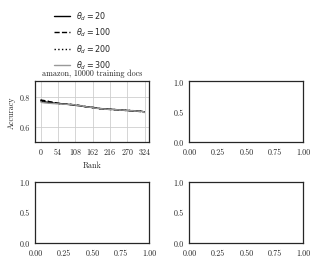

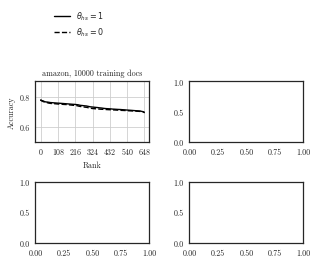

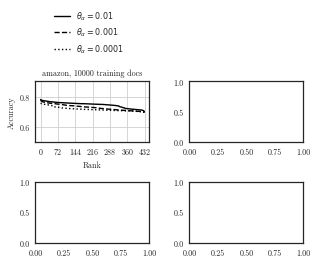

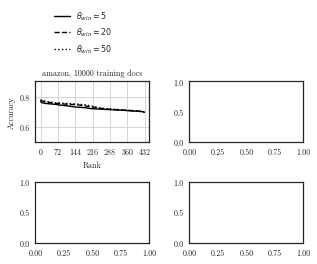

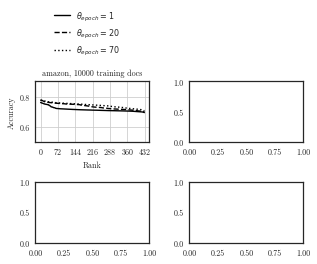

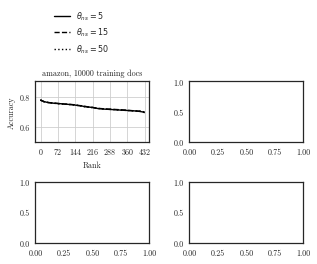

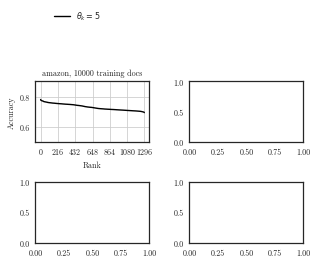

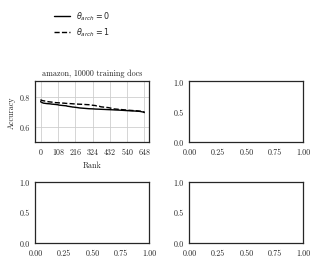

In [12]:
for param in experiment_data['gs_params']:
    plot_best_classifiers(experiment_data, parameter=param)